In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.xkcd()
import glob

# Load an example month

In [50]:
files = glob.glob('D:/mmij_raw_tmp/mmij-meteo-raw-2012-11/*.csv')
df = pd.concat([pd.read_csv(file, skiprows=[0,2], delimiter=';', usecols=[64]) for file in files])
df.head()

,MMIJ_H92B180_Ws_Q1
0,17.0165
1,16.9266
2,17.2860
3,17.2410
4,16.7358


# Determine the wind speed jump that is exceeded 1% of the time, for different periods
This is a very dirty approach, as the difference will be evaluated for each consecutive time. Thus, the same wind speed jump will contribute several times. On the other hand, all other less significant jumps are also oversampled. A better way would be to resample or use a maximum filter or so. 

Text(0, 0.5, 'wind up-ramp (99-percentile) (m/s)')

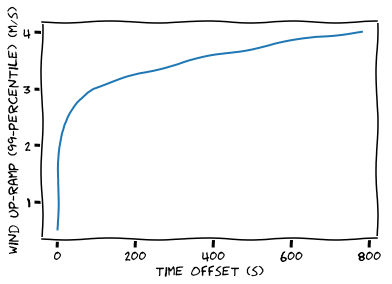

In [73]:
ramps = []
dt = np.unique(np.logspace(0, 5, base=5, dtype='int'))
for period in dt:
    ramps.append(df.diff(period).quantile(0.99))
    
fig, ax = plt.subplots()
ax.plot(dt*0.25, ramps)
ax.set_xlabel('time offset (s)')
ax.set_ylabel('wind up-ramp (99-percentile) (m/s)')

# Now, find the maximum ramp for each period. 
This will probably be the same event but smeared out over different periods.

Text(0, 0.5, 'wind up-ramp (maximum) (m/s)')

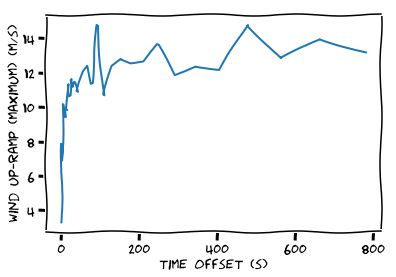

In [72]:
ramps = []
dt = np.unique(np.logspace(0, 5, base=5, dtype='int'))
for period in dt:
    ramps.append(df.diff(period).max())
    
fig, ax = plt.subplots()
ax.plot(dt*0.25, ramps)
ax.set_xlabel('time offset (s)')
ax.set_ylabel('wind up-ramp (maximum) (m/s)')

# Visualize the maximum ramp event to inspect whether the wind speed evolution is realistic
It would be interesting to check whether the other boom recorded the same or similar time evolution, as a validation.

In [70]:
tmax = df.MMIJ_H92B180_Ws_Q1.diff(400).idxmax()

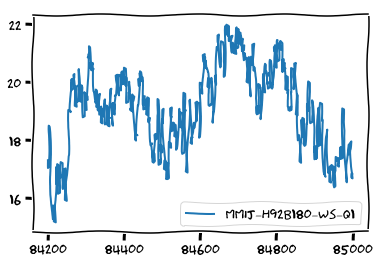

In [71]:
df.iloc[tmax-400:tmax+400].plot()